In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单分类数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=int)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    #以y区分两类x
    x0 = x[y == -1]
    x1 = x[y == 1]

    #转矩阵
    x0 = np.mat(x0)
    x1 = np.mat(x1)

    return x0, x1


x0, x1 = load_data()
x0[:5], x1[:5]

(matrix([[-0.017612, 14.053064],
         [-0.752157,  6.53862 ],
         [-1.322371,  7.152853],
         [ 0.423363, 11.054677],
         [ 0.667394, 12.741452]]),
 matrix([[-1.395634,  4.662541],
         [ 0.406704,  7.067335],
         [-2.46015 ,  6.866805],
         [ 0.850433,  6.920334],
         [ 1.176813,  3.16702 ]]))

In [2]:
#求向量均值
mu0 = x0.mean(axis=0)
mu1 = x1.mean(axis=0)
mu0, mu1

(matrix([[ 0.08204613, 10.65488423]]), matrix([[-0.01613109,  2.95908379]]))

In [3]:
#求方差,这里的方差是求所有维度的方差的和
sigma0 = np.power(x0 - mu0, 2).sum()
sigma1 = np.power(x1 - mu1, 2).sum()
sigma0, sigma1

(214.65774583851362, 581.3715229024133)

In [4]:
#初始化w
w = np.mat(np.ones(2))
w

matrix([[1., 1.]])

In [5]:
#按照书上的思路,定义sw和sb
sw = sigma0 + sigma1
sb = (mu0 - mu1).T * (mu0 - mu1)
sw, sb

(796.0292687409269,
 matrix([[9.63876692e-03, 7.55552308e-01],
         [7.55552308e-01, 5.92253444e+01]]))

In [6]:
#约束:w * sw * w.T = 1
#求最大:w * sb * w.T
#后面的变换没看懂, 总之最后可以写出下面这个式子
w = 1 / (sw) * (mu0 - mu1)
w

matrix([[0.00012333, 0.00966774]])

In [7]:
#投影
#(N,2) * (2,1) = (N,1)
p0 = x0 * w.T
p1 = x1 * w.T

p0[:5], p1[:5]

(matrix([[0.13585913],
         [0.06312088],
         [0.0689888 ],
         [0.10692591],
         [0.1232633 ]]),
 matrix([[0.04490408],
         [0.06837529],
         [0.06608304],
         [0.06700885],
         [0.03076305]]))

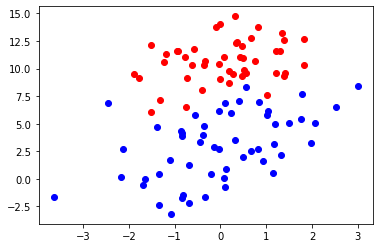

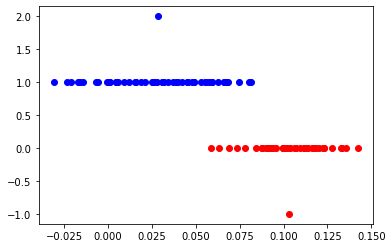

In [8]:
import matplotlib.pyplot as plt


def draw():
    plt.scatter(x0[:, 0].A, x0[:, 1].A, c='red')
    plt.scatter(x1[:, 0].A, x1[:, 1].A, c='blue')

    plt.show()

    plt.scatter(p0.A, np.zeros(len(p0)), c='red')
    plt.scatter(p1.A, np.ones(len(p1)), c='blue')

    plt.scatter(p0.mean(), -1, c='red')
    plt.scatter(p1.mean(), 2, c='blue')

    plt.show()


draw()

In [9]:
#预测函数
def predict(p):
    d0 = np.power(p - p0.mean(), 2)
    d1 = np.power(p - p1.mean(), 2)
    pred = 1 if d0 > d1 else -1
    return pred


predict(p0[0])

-1

In [10]:
#测试
correct = 0
for i in p0:
    if predict(i) == -1:
        correct += 1

for i in p1:
    if predict(i) == 1:
        correct += 1

correct / (len(p0) + len(p1))

0.91